# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:05<00:00, 11.9KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

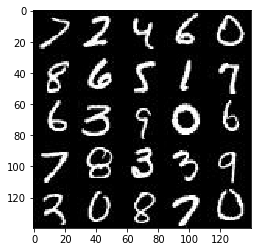

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

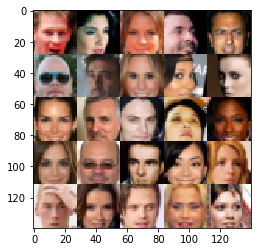

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [7]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    return (tf.placeholder(tf.float32, [None, image_width, image_height, image_channels] ), tf.placeholder(tf.float32, [None, z_dim]) , tf.placeholder(tf.float32))


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [46]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    alpha = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):

        
        network = tf.layers.conv2d(images, 32, 5, strides=2, padding='same')
        network = tf.maximum(alpha * network, network)
        
        network = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        network = tf.layers.batch_normalization(network, training=True)
        network = tf.maximum(alpha * network, network)

        
        network = tf.layers.conv2d(network, 128, 5, strides=2, padding='same')
        network = tf.layers.batch_normalization(network, training=True)
        network = tf.maximum(alpha * network, network)

        
        network = tf.layers.conv2d(network, 256, 5, strides=2, padding='same')
        network = tf.layers.batch_normalization(network, training=True)
        network = tf.maximum(alpha * network, network)


        network = tf.reshape(network, (-1, 4096))
        
        logits = tf.layers.dense(network, 1)
        out = tf.sigmoid(logits)
        
        return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [47]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('generator', reuse=not is_train):
        network = tf.layers.dense(z, 1024)
        network = tf.layers.dense(z, 2048)
        network = tf.reshape(network, (-1, 2, 2, 512))
        network = tf.maximum(alpha * network, network)
        
        
        network = tf.layers.conv2d_transpose(network, 256, 5, strides=2, padding='valid')
        network = tf.layers.batch_normalization(network, training=is_train)
        network = tf.maximum(alpha * network, network)
        
        
        network = tf.layers.conv2d_transpose(network, 128, 5, strides=2, padding='same')
        network = tf.layers.batch_normalization(network, training=is_train)
        network = tf.maximum(alpha * network, network)
        
        
        
        
        logits = tf.layers.conv2d_transpose(network, out_channel_dim, 5, strides=2, padding='same')
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [48]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    gen_model = generator(input_z, out_channel_dim, is_train=True)
    dis_model_real, dis_logits_real = discriminator(input_real, reuse=False)
    dis_model_fake, dis_logits_fake = discriminator(gen_model, reuse=True)

    dis_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_real, labels=tf.ones_like(dis_model_real)))
    dis_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_fake, labels=tf.zeros_like(dis_model_fake)))
    gen_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_fake, labels=tf.ones_like(dis_model_fake)))

    dis_loss = dis_loss_real + dis_loss_fake

    return dis_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [49]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    dis_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    gen_vars = [var for var in t_vars if var.name.startswith('generator')]

    dis_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=dis_vars)
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)): 
        gen_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=gen_vars)

    return dis_train_opt, gen_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [50]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [65]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    n_samples, image_width, image_height, image_channels = data_shape
    input_real, input_z, learning_rate_t = model_inputs(image_width, image_height, image_channels, z_dim)
    dis_loss, gen_loss = model_loss(input_real, input_z, image_channels)
    dis_opt, gen_opt = model_opt(dis_loss, gen_loss, learning_rate, beta1)
    
    steps = 0
    print_after = 50
    show_after = 100
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images *= 2
                # TODO: Train Model
                steps += 1
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(dis_opt, feed_dict={input_real: batch_images, input_z: batch_z, learning_rate_t: learning_rate})
                _ = sess.run(gen_opt, feed_dict={input_real: batch_images, input_z: batch_z, learning_rate_t: learning_rate})

                if steps % show_after == 0:
                    n_images = 36
                    show_generator_output(sess, n_images, input_z, image_channels, data_image_mode)

                if steps % print_after == 0:
                    loss_dis = dis_loss.eval({input_z: batch_z, input_real: batch_images})
                    loss_gen = gen_loss.eval({input_z: batch_z})
                    print("Epoch {}/{}...".format(epoch, epoch_count),"Generator Loss: {:.4f}".format(loss_gen),"Discriminator Loss: {:.4f}...".format(loss_dis))

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2... Generator Loss: 0.8894 Discriminator Loss: 2.0887...


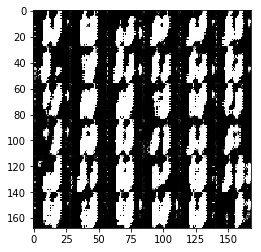

Epoch 0/2... Generator Loss: 2.1274 Discriminator Loss: 0.3950...
Epoch 0/2... Generator Loss: 2.5810 Discriminator Loss: 0.3548...


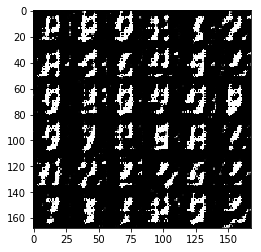

Epoch 0/2... Generator Loss: 0.9414 Discriminator Loss: 1.3311...
Epoch 0/2... Generator Loss: 2.0689 Discriminator Loss: 0.3604...


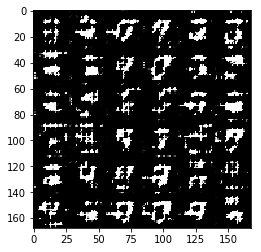

Epoch 0/2... Generator Loss: 1.1779 Discriminator Loss: 0.6805...
Epoch 0/2... Generator Loss: 1.5169 Discriminator Loss: 0.5641...


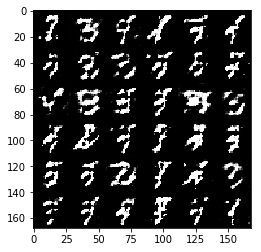

Epoch 0/2... Generator Loss: 1.4206 Discriminator Loss: 0.4892...
Epoch 0/2... Generator Loss: 2.6811 Discriminator Loss: 0.7217...


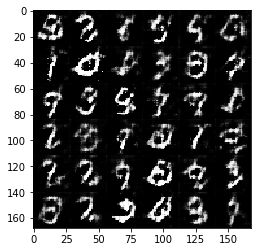

Epoch 0/2... Generator Loss: 0.9203 Discriminator Loss: 1.0836...
Epoch 0/2... Generator Loss: 2.1291 Discriminator Loss: 1.0252...


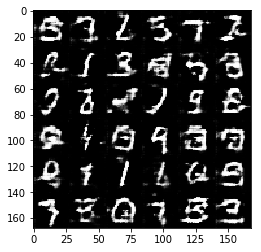

Epoch 0/2... Generator Loss: 2.0955 Discriminator Loss: 0.5174...
Epoch 0/2... Generator Loss: 0.6936 Discriminator Loss: 1.0792...


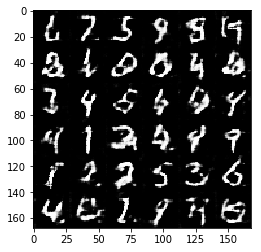

Epoch 0/2... Generator Loss: 0.5167 Discriminator Loss: 1.3780...
Epoch 0/2... Generator Loss: 0.4813 Discriminator Loss: 1.3657...


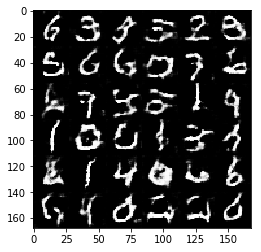

Epoch 0/2... Generator Loss: 2.6599 Discriminator Loss: 0.6816...
Epoch 0/2... Generator Loss: 0.5716 Discriminator Loss: 1.1279...


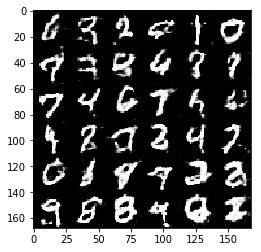

Epoch 0/2... Generator Loss: 0.4308 Discriminator Loss: 1.8871...
Epoch 0/2... Generator Loss: 1.1792 Discriminator Loss: 0.8671...


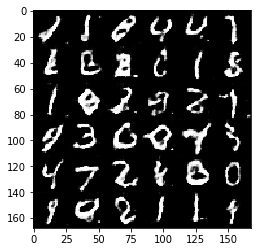

Epoch 0/2... Generator Loss: 3.0282 Discriminator Loss: 0.8115...
Epoch 0/2... Generator Loss: 0.9434 Discriminator Loss: 0.8435...


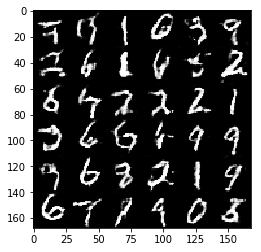

Epoch 0/2... Generator Loss: 1.1471 Discriminator Loss: 0.7063...
Epoch 0/2... Generator Loss: 1.4278 Discriminator Loss: 0.9856...


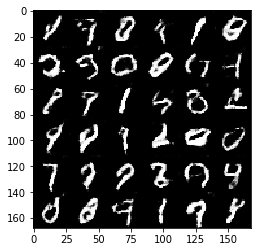

Epoch 0/2... Generator Loss: 1.8529 Discriminator Loss: 0.4893...
Epoch 0/2... Generator Loss: 0.6410 Discriminator Loss: 1.2600...


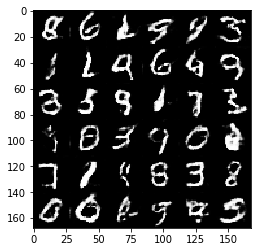

Epoch 0/2... Generator Loss: 0.9359 Discriminator Loss: 0.8236...
Epoch 0/2... Generator Loss: 0.3035 Discriminator Loss: 1.9649...


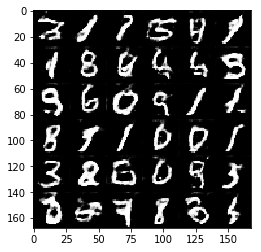

Epoch 0/2... Generator Loss: 0.6863 Discriminator Loss: 1.0674...
Epoch 0/2... Generator Loss: 0.7928 Discriminator Loss: 0.9867...


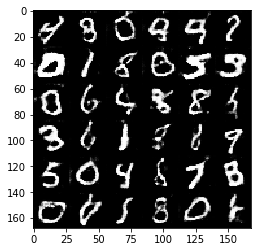

Epoch 0/2... Generator Loss: 1.1922 Discriminator Loss: 0.6362...
Epoch 0/2... Generator Loss: 1.0257 Discriminator Loss: 0.8838...


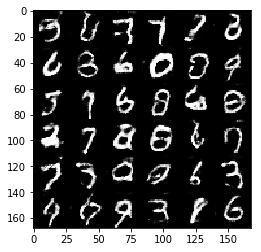

Epoch 0/2... Generator Loss: 0.5261 Discriminator Loss: 1.4543...
Epoch 0/2... Generator Loss: 3.1954 Discriminator Loss: 0.8109...


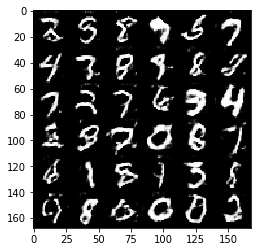

Epoch 0/2... Generator Loss: 0.1932 Discriminator Loss: 2.7423...
Epoch 0/2... Generator Loss: 0.7991 Discriminator Loss: 0.9115...


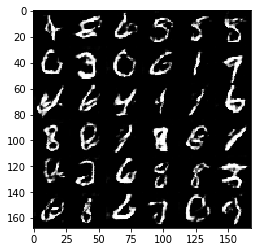

Epoch 0/2... Generator Loss: 2.4812 Discriminator Loss: 0.2344...
Epoch 0/2... Generator Loss: 0.3644 Discriminator Loss: 1.6291...


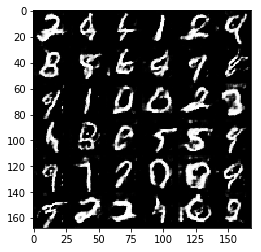

Epoch 1/2... Generator Loss: 0.7305 Discriminator Loss: 1.0793...
Epoch 1/2... Generator Loss: 0.4917 Discriminator Loss: 1.4518...


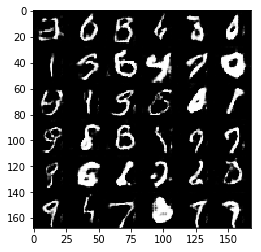

Epoch 1/2... Generator Loss: 5.7986 Discriminator Loss: 2.3949...
Epoch 1/2... Generator Loss: 3.9076 Discriminator Loss: 2.0999...


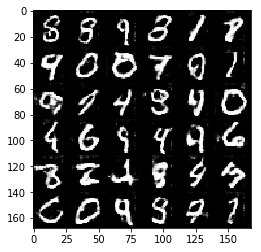

Epoch 1/2... Generator Loss: 0.7119 Discriminator Loss: 1.1602...
Epoch 1/2... Generator Loss: 0.1540 Discriminator Loss: 2.4763...


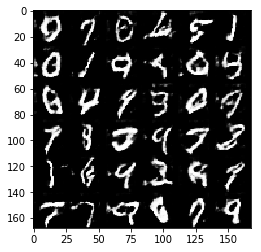

Epoch 1/2... Generator Loss: 0.7590 Discriminator Loss: 1.0007...
Epoch 1/2... Generator Loss: 1.8258 Discriminator Loss: 0.3731...


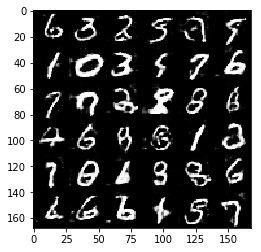

Epoch 1/2... Generator Loss: 0.7391 Discriminator Loss: 0.9893...
Epoch 1/2... Generator Loss: 1.3891 Discriminator Loss: 0.6013...


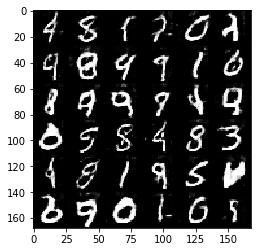

Epoch 1/2... Generator Loss: 0.7499 Discriminator Loss: 1.2536...
Epoch 1/2... Generator Loss: 1.8815 Discriminator Loss: 0.5398...


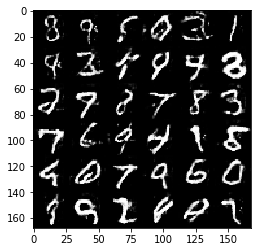

Epoch 1/2... Generator Loss: 0.6064 Discriminator Loss: 1.2704...
Epoch 1/2... Generator Loss: 3.1406 Discriminator Loss: 0.3513...


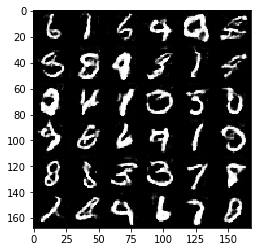

Epoch 1/2... Generator Loss: 0.5782 Discriminator Loss: 1.2479...
Epoch 1/2... Generator Loss: 0.7109 Discriminator Loss: 1.0007...


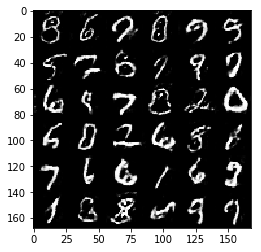

Epoch 1/2... Generator Loss: 4.9967 Discriminator Loss: 0.9979...
Epoch 1/2... Generator Loss: 2.1065 Discriminator Loss: 0.5178...


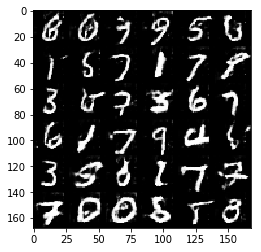

Epoch 1/2... Generator Loss: 0.2300 Discriminator Loss: 2.4160...
Epoch 1/2... Generator Loss: 4.7186 Discriminator Loss: 1.3368...


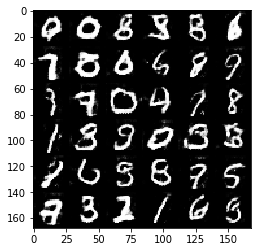

Epoch 1/2... Generator Loss: 3.7193 Discriminator Loss: 0.1394...
Epoch 1/2... Generator Loss: 0.5577 Discriminator Loss: 1.4769...


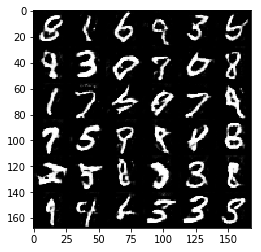

Epoch 1/2... Generator Loss: 0.2409 Discriminator Loss: 2.4297...
Epoch 1/2... Generator Loss: 2.2322 Discriminator Loss: 0.2091...


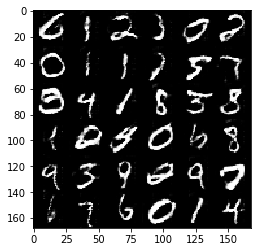

Epoch 1/2... Generator Loss: 2.2976 Discriminator Loss: 0.4214...
Epoch 1/2... Generator Loss: 0.3523 Discriminator Loss: 2.0121...


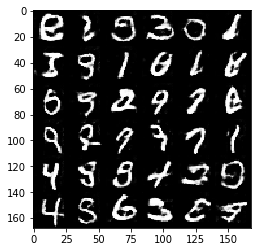

Epoch 1/2... Generator Loss: 7.4969 Discriminator Loss: 2.3544...
Epoch 1/2... Generator Loss: 0.8389 Discriminator Loss: 0.9362...


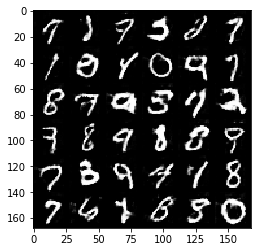

Epoch 1/2... Generator Loss: 1.8464 Discriminator Loss: 0.6967...
Epoch 1/2... Generator Loss: 0.7433 Discriminator Loss: 1.3018...


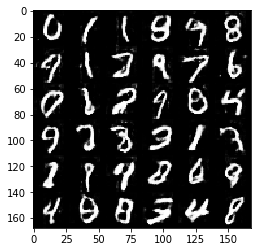

Epoch 1/2... Generator Loss: 1.3359 Discriminator Loss: 0.7468...
Epoch 1/2... Generator Loss: 1.8123 Discriminator Loss: 0.4435...


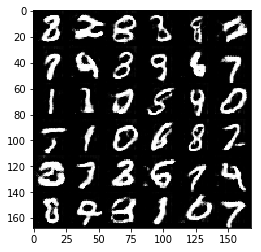

Epoch 1/2... Generator Loss: 1.1992 Discriminator Loss: 0.5819...
Epoch 1/2... Generator Loss: 1.9154 Discriminator Loss: 0.3829...


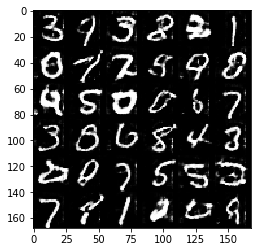

Epoch 1/2... Generator Loss: 1.0132 Discriminator Loss: 1.2257...
Epoch 1/2... Generator Loss: 1.6060 Discriminator Loss: 0.4770...


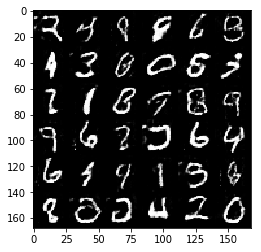

Epoch 1/2... Generator Loss: 0.2215 Discriminator Loss: 2.7390...
Epoch 1/2... Generator Loss: 1.7742 Discriminator Loss: 0.7772...


In [66]:
batch_size = 32
z_dim = 100
learning_rate = 0.01
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1... Generator Loss: 12.3869 Discriminator Loss: 2.6482...


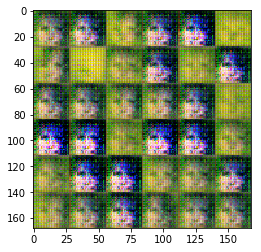

Epoch 0/1... Generator Loss: 0.9526 Discriminator Loss: 1.2093...
Epoch 0/1... Generator Loss: 4.2933 Discriminator Loss: 0.3954...


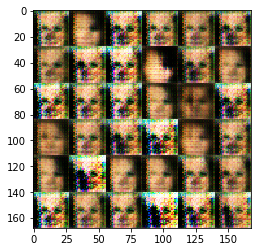

Epoch 0/1... Generator Loss: 2.4101 Discriminator Loss: 0.4539...
Epoch 0/1... Generator Loss: 0.4738 Discriminator Loss: 1.5382...


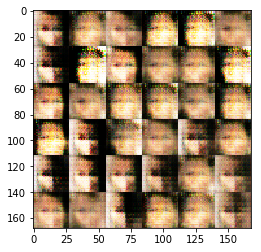

Epoch 0/1... Generator Loss: 1.1148 Discriminator Loss: 1.1637...
Epoch 0/1... Generator Loss: 1.8478 Discriminator Loss: 1.0698...


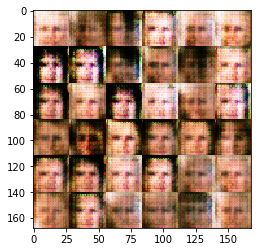

Epoch 0/1... Generator Loss: 0.6534 Discriminator Loss: 1.3072...
Epoch 0/1... Generator Loss: 0.9788 Discriminator Loss: 1.1305...


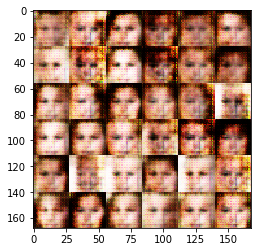

Epoch 0/1... Generator Loss: 1.2451 Discriminator Loss: 1.3246...
Epoch 0/1... Generator Loss: 0.7544 Discriminator Loss: 1.0341...


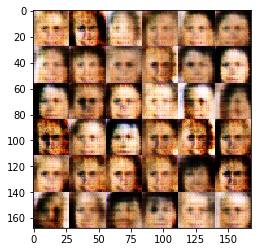

Epoch 0/1... Generator Loss: 0.8306 Discriminator Loss: 1.1102...
Epoch 0/1... Generator Loss: 1.3901 Discriminator Loss: 0.9196...


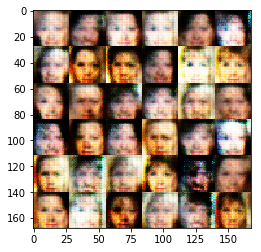

Epoch 0/1... Generator Loss: 0.8613 Discriminator Loss: 1.1129...
Epoch 0/1... Generator Loss: 1.3366 Discriminator Loss: 1.3770...


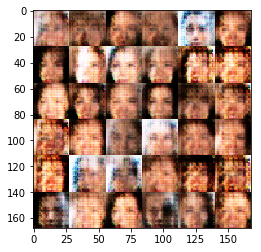

Epoch 0/1... Generator Loss: 0.9907 Discriminator Loss: 1.0607...
Epoch 0/1... Generator Loss: 0.6505 Discriminator Loss: 1.1297...


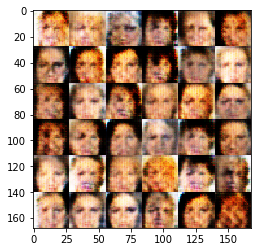

Epoch 0/1... Generator Loss: 0.5571 Discriminator Loss: 1.1533...
Epoch 0/1... Generator Loss: 1.1383 Discriminator Loss: 1.0183...


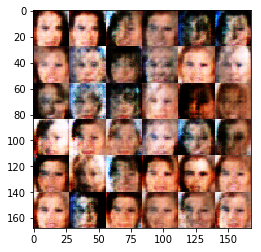

Epoch 0/1... Generator Loss: 0.9177 Discriminator Loss: 0.8833...
Epoch 0/1... Generator Loss: 1.1687 Discriminator Loss: 0.9286...


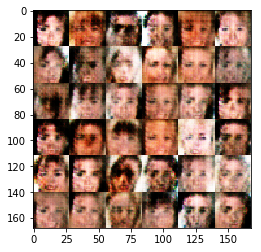

Epoch 0/1... Generator Loss: 1.2129 Discriminator Loss: 0.9768...
Epoch 0/1... Generator Loss: 0.5796 Discriminator Loss: 1.2492...


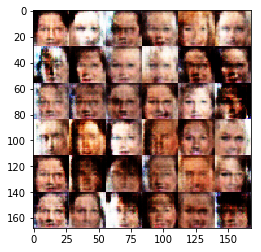

Epoch 0/1... Generator Loss: 0.3958 Discriminator Loss: 1.4302...
Epoch 0/1... Generator Loss: 1.3221 Discriminator Loss: 1.3006...


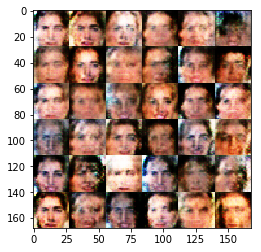

Epoch 0/1... Generator Loss: 0.9150 Discriminator Loss: 0.9171...
Epoch 0/1... Generator Loss: 1.7870 Discriminator Loss: 1.1428...


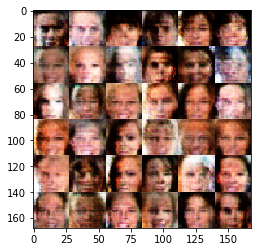

Epoch 0/1... Generator Loss: 0.5176 Discriminator Loss: 1.3739...
Epoch 0/1... Generator Loss: 0.7768 Discriminator Loss: 0.9834...


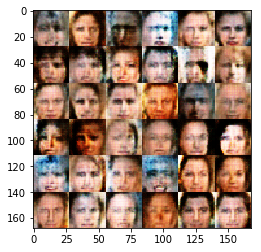

Epoch 0/1... Generator Loss: 0.9824 Discriminator Loss: 0.8462...
Epoch 0/1... Generator Loss: 1.2634 Discriminator Loss: 1.0452...


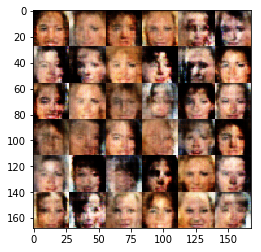

Epoch 0/1... Generator Loss: 0.9377 Discriminator Loss: 1.2317...
Epoch 0/1... Generator Loss: 0.5464 Discriminator Loss: 1.1913...


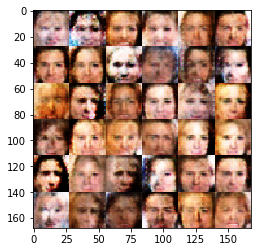

Epoch 0/1... Generator Loss: 1.7694 Discriminator Loss: 1.1525...
Epoch 0/1... Generator Loss: 1.3637 Discriminator Loss: 0.8632...


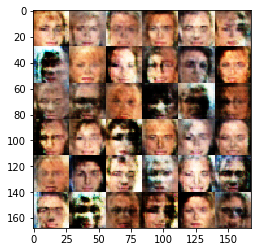

Epoch 0/1... Generator Loss: 1.2910 Discriminator Loss: 0.8732...
Epoch 0/1... Generator Loss: 2.1144 Discriminator Loss: 1.1381...


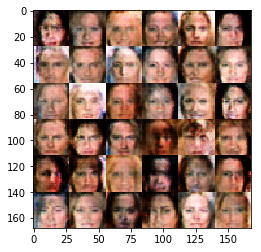

Epoch 0/1... Generator Loss: 1.3011 Discriminator Loss: 1.1269...
Epoch 0/1... Generator Loss: 0.5908 Discriminator Loss: 1.2347...


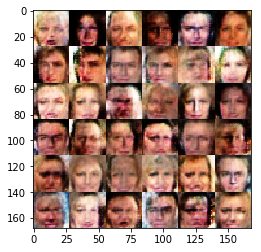

Epoch 0/1... Generator Loss: 0.4815 Discriminator Loss: 1.3464...
Epoch 0/1... Generator Loss: 1.7930 Discriminator Loss: 1.4163...


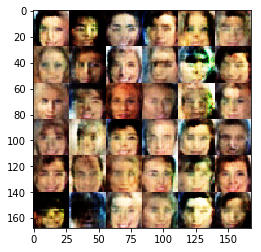

Epoch 0/1... Generator Loss: 0.9962 Discriminator Loss: 0.8784...
Epoch 0/1... Generator Loss: 1.8440 Discriminator Loss: 1.2972...


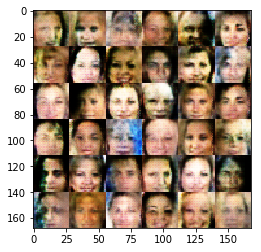

Epoch 0/1... Generator Loss: 0.6693 Discriminator Loss: 1.1213...
Epoch 0/1... Generator Loss: 0.2017 Discriminator Loss: 1.9979...


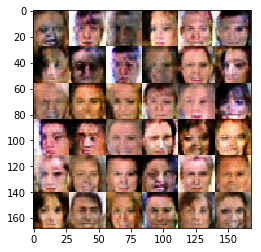

Epoch 0/1... Generator Loss: 0.5515 Discriminator Loss: 1.1511...
Epoch 0/1... Generator Loss: 0.9512 Discriminator Loss: 0.9740...


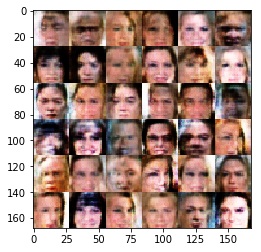

Epoch 0/1... Generator Loss: 1.0323 Discriminator Loss: 0.9539...
Epoch 0/1... Generator Loss: 0.5732 Discriminator Loss: 1.2058...


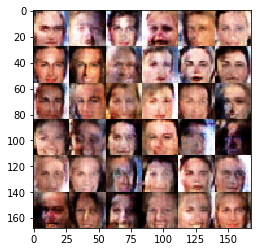

Epoch 0/1... Generator Loss: 0.6615 Discriminator Loss: 1.1271...
Epoch 0/1... Generator Loss: 1.0139 Discriminator Loss: 1.0151...


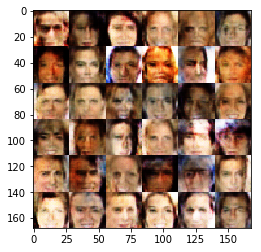

Epoch 0/1... Generator Loss: 0.8035 Discriminator Loss: 1.0474...
Epoch 0/1... Generator Loss: 1.4726 Discriminator Loss: 0.9904...


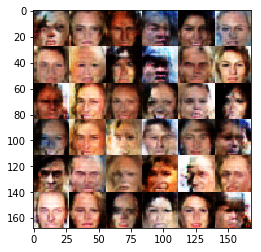

Epoch 0/1... Generator Loss: 0.9316 Discriminator Loss: 0.9792...
Epoch 0/1... Generator Loss: 1.0026 Discriminator Loss: 0.8533...


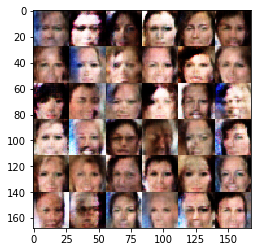

Epoch 0/1... Generator Loss: 0.4456 Discriminator Loss: 1.4114...
Epoch 0/1... Generator Loss: 0.6561 Discriminator Loss: 1.0021...


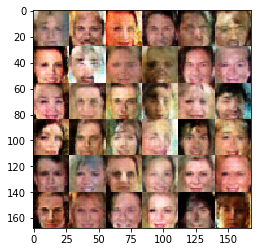

Epoch 0/1... Generator Loss: 0.4867 Discriminator Loss: 1.2546...
Epoch 0/1... Generator Loss: 0.6970 Discriminator Loss: 1.0809...


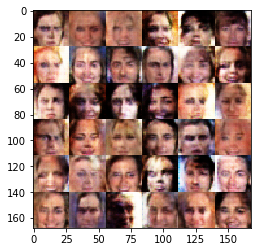

Epoch 0/1... Generator Loss: 1.0089 Discriminator Loss: 0.9762...
Epoch 0/1... Generator Loss: 0.6434 Discriminator Loss: 1.0922...


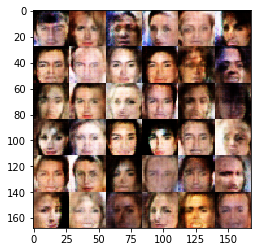

Epoch 0/1... Generator Loss: 1.7153 Discriminator Loss: 1.1635...
Epoch 0/1... Generator Loss: 0.5957 Discriminator Loss: 1.0922...


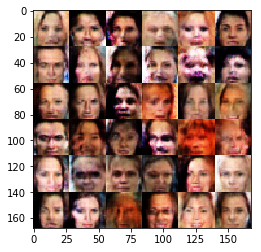

Epoch 0/1... Generator Loss: 0.7764 Discriminator Loss: 1.0080...
Epoch 0/1... Generator Loss: 0.6716 Discriminator Loss: 1.0461...


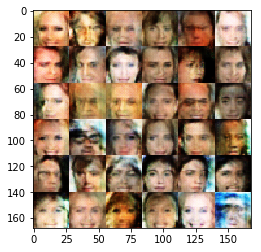

Epoch 0/1... Generator Loss: 1.4739 Discriminator Loss: 0.6939...
Epoch 0/1... Generator Loss: 0.4540 Discriminator Loss: 1.3365...


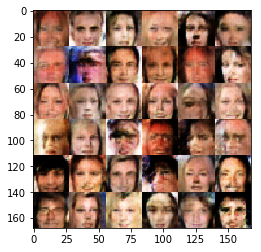

Epoch 0/1... Generator Loss: 0.8317 Discriminator Loss: 1.5833...
Epoch 0/1... Generator Loss: 0.5084 Discriminator Loss: 1.3585...


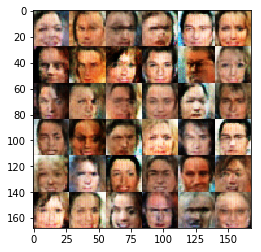

Epoch 0/1... Generator Loss: 1.6489 Discriminator Loss: 1.2886...
Epoch 0/1... Generator Loss: 0.7929 Discriminator Loss: 0.8349...


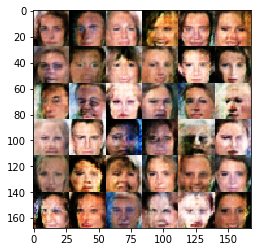

Epoch 0/1... Generator Loss: 1.3277 Discriminator Loss: 0.8419...
Epoch 0/1... Generator Loss: 1.6405 Discriminator Loss: 1.5456...


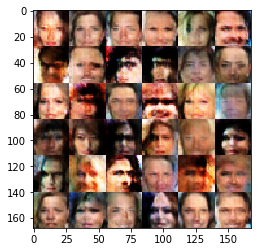

Epoch 0/1... Generator Loss: 0.9731 Discriminator Loss: 1.0426...
Epoch 0/1... Generator Loss: 1.1046 Discriminator Loss: 1.0368...


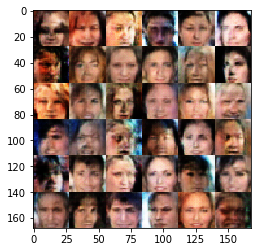

Epoch 0/1... Generator Loss: 0.7534 Discriminator Loss: 0.9346...
Epoch 0/1... Generator Loss: 0.6194 Discriminator Loss: 1.0726...


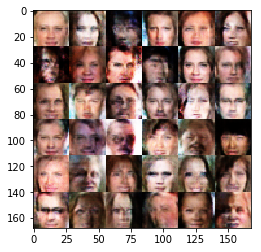

Epoch 0/1... Generator Loss: 0.7579 Discriminator Loss: 1.1877...
Epoch 0/1... Generator Loss: 0.6400 Discriminator Loss: 1.1871...


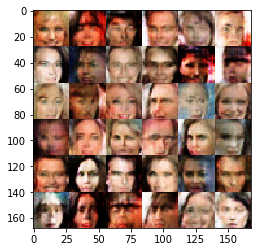

Epoch 0/1... Generator Loss: 1.2523 Discriminator Loss: 0.8638...
Epoch 0/1... Generator Loss: 0.8745 Discriminator Loss: 0.9635...


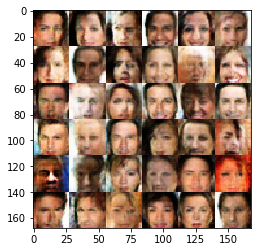

Epoch 0/1... Generator Loss: 0.6904 Discriminator Loss: 1.0845...
Epoch 0/1... Generator Loss: 0.6183 Discriminator Loss: 1.1711...


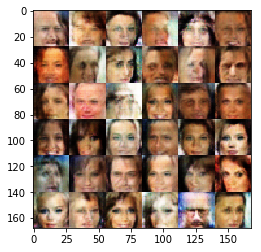

Epoch 0/1... Generator Loss: 1.6830 Discriminator Loss: 0.9954...
Epoch 0/1... Generator Loss: 0.4243 Discriminator Loss: 1.3172...


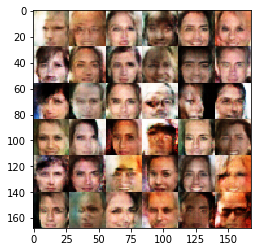

Epoch 0/1... Generator Loss: 1.0347 Discriminator Loss: 1.0904...
Epoch 0/1... Generator Loss: 0.9410 Discriminator Loss: 1.0494...


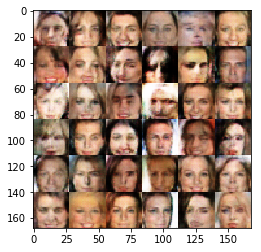

Epoch 0/1... Generator Loss: 0.5228 Discriminator Loss: 1.1774...
Epoch 0/1... Generator Loss: 0.4860 Discriminator Loss: 1.2389...


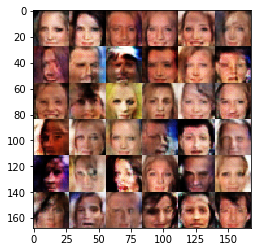

Epoch 0/1... Generator Loss: 1.0769 Discriminator Loss: 0.9685...
Epoch 0/1... Generator Loss: 0.4315 Discriminator Loss: 1.4705...


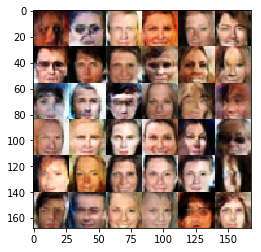

Epoch 0/1... Generator Loss: 0.5921 Discriminator Loss: 1.2536...
Epoch 0/1... Generator Loss: 0.8731 Discriminator Loss: 1.0967...


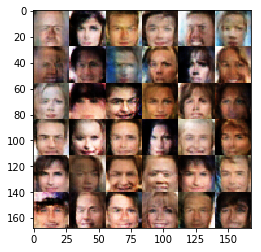

Epoch 0/1... Generator Loss: 0.7335 Discriminator Loss: 1.0856...
Epoch 0/1... Generator Loss: 1.1492 Discriminator Loss: 0.8340...


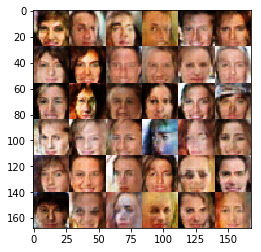

Epoch 0/1... Generator Loss: 1.6249 Discriminator Loss: 1.4869...
Epoch 0/1... Generator Loss: 0.8393 Discriminator Loss: 1.0798...


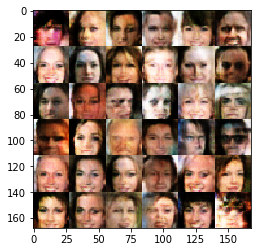

Epoch 0/1... Generator Loss: 0.6236 Discriminator Loss: 1.0461...
Epoch 0/1... Generator Loss: 0.4817 Discriminator Loss: 1.3149...


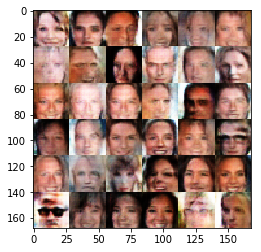

Epoch 0/1... Generator Loss: 0.8025 Discriminator Loss: 1.0915...
Epoch 0/1... Generator Loss: 0.5138 Discriminator Loss: 1.2409...


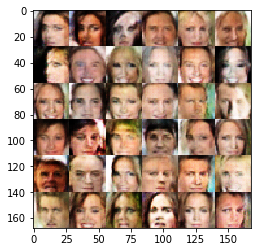

Epoch 0/1... Generator Loss: 0.5933 Discriminator Loss: 1.1428...
Epoch 0/1... Generator Loss: 0.7098 Discriminator Loss: 1.0828...


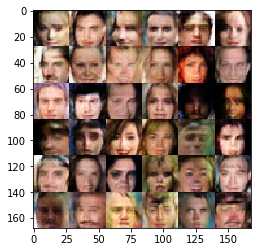

Epoch 0/1... Generator Loss: 0.6506 Discriminator Loss: 1.2170...
Epoch 0/1... Generator Loss: 0.6229 Discriminator Loss: 1.2524...


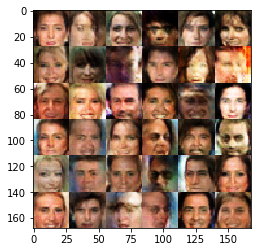

Epoch 0/1... Generator Loss: 0.8285 Discriminator Loss: 1.2742...
Epoch 0/1... Generator Loss: 1.1920 Discriminator Loss: 1.1434...


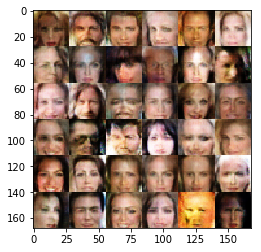

Epoch 0/1... Generator Loss: 0.7775 Discriminator Loss: 1.0000...
Epoch 0/1... Generator Loss: 0.7940 Discriminator Loss: 1.0635...


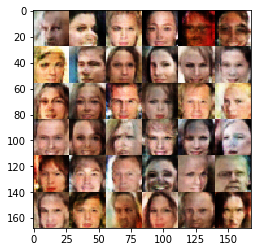

Epoch 0/1... Generator Loss: 0.7906 Discriminator Loss: 1.0504...
Epoch 0/1... Generator Loss: 0.7287 Discriminator Loss: 0.9527...


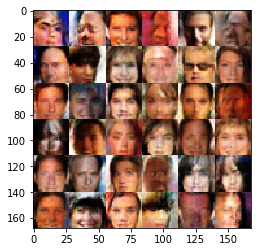

Epoch 0/1... Generator Loss: 0.9852 Discriminator Loss: 0.9843...
Epoch 0/1... Generator Loss: 0.6956 Discriminator Loss: 1.3286...


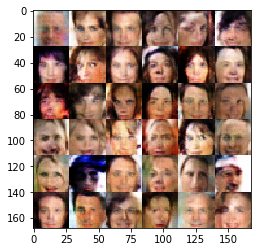

Epoch 0/1... Generator Loss: 1.0482 Discriminator Loss: 0.9800...
Epoch 0/1... Generator Loss: 0.5290 Discriminator Loss: 1.3631...


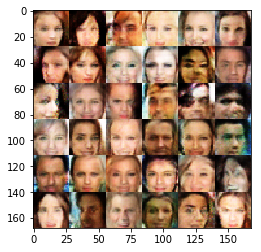

Epoch 0/1... Generator Loss: 0.7783 Discriminator Loss: 1.0601...
Epoch 0/1... Generator Loss: 0.9574 Discriminator Loss: 1.1959...


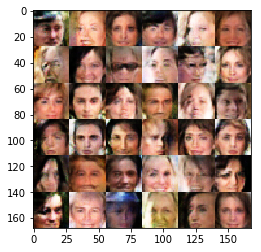

Epoch 0/1... Generator Loss: 0.5631 Discriminator Loss: 1.3065...
Epoch 0/1... Generator Loss: 0.9767 Discriminator Loss: 1.0364...


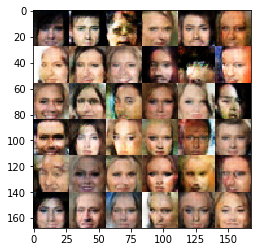

Epoch 0/1... Generator Loss: 1.1325 Discriminator Loss: 0.9412...
Epoch 0/1... Generator Loss: 0.5975 Discriminator Loss: 1.2156...


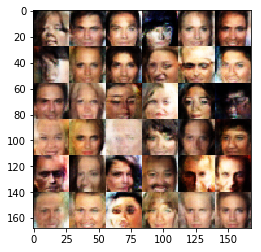

Epoch 0/1... Generator Loss: 0.8624 Discriminator Loss: 1.2401...
Epoch 0/1... Generator Loss: 0.7220 Discriminator Loss: 1.0656...


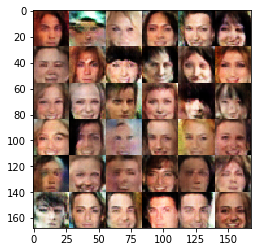

Epoch 0/1... Generator Loss: 0.9352 Discriminator Loss: 0.9608...
Epoch 0/1... Generator Loss: 1.1057 Discriminator Loss: 1.1613...


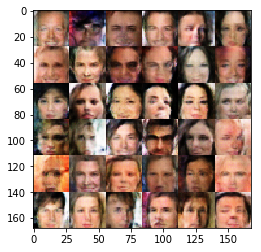

Epoch 0/1... Generator Loss: 0.5168 Discriminator Loss: 1.2714...


In [67]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.